In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# 전처리된 인구데이터와 cctv 데이터 준비
df_population = pd.read_csv('data-files/population-in-seoul-2024.csv')
print( df_population.head() )
df_cctv = pd.read_csv('data-files/cctv-in-seoul-2.csv')
df_cctv.head()

   자치구  2024-인구수  2024-한국인  2024-외국인  2024-고령자     외국인비율     고령자비율
0  종로구    149608    138336     11272     29840  0.075344  0.199455
1   중구    131214    120544     10670     26853  0.081318  0.204650
2  용산구    217194    203854     13340     39407  0.061420  0.181437
3  성동구    281289    273669      7620     51245  0.027090  0.182179
4  광진구    348652    331963     16689     59743  0.047867  0.171354


,자치구,총 계,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년,최근증가율
0,종로구,2339.0,146.0,76.0,115.0,137.0,68.0,231.0,86.0,234.0,924.0,322.0,1.722934
1,중 구,3118.0,356.0,219.0,366.0,385.0,159.0,352.0,416.0,137.0,135.0,593.0,0.383933
2,용산구,3609.0,24.0,124.0,454.0,119.0,335.0,625.0,431.0,457.0,411.0,629.0,0.708807
3,성동구,4638.0,1295.0,228.0,881.0,383.0,477.0,386.0,294.0,170.0,320.0,204.0,0.175963
4,광진구,4636.0,247.0,38.0,660.0,465.0,710.0,194.0,744.0,276.0,348.0,954.0,0.516024


In [31]:
# 두 데이터프레임을 자치구 기준으로 병합
# pd.merge(left=df_cctv, right=df_population) # 같은 컬럼 이름을 찾아서 그 컬럼을 기준으로 병합
pd.merge(left=df_cctv, right=df_population,
         left_on="자치구", right_on="자치구")

,자치구,총 계,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년,최근증가율,2024-인구수,2024-한국인,2024-외국인,2024-고령자,외국인비율,고령자비율
0,종로구,2339.0,146.0,76.0,115.0,137.0,68.0,231.0,86.0,234.0,924.0,322.0,1.722934,149608,138336,11272,29840,0.075344,0.199455
1,용산구,3609.0,24.0,124.0,454.0,119.0,335.0,625.0,431.0,457.0,411.0,629.0,0.708807,217194,203854,13340,39407,0.061420,0.181437
2,성동구,4638.0,1295.0,228.0,881.0,383.0,477.0,386.0,294.0,170.0,320.0,204.0,0.175963,281289,273669,7620,51245,0.027090,0.182179
3,광진구,4636.0,247.0,38.0,660.0,465.0,710.0,194.0,744.0,276.0,348.0,954.0,0.516024,348652,331963,16689,59743,0.047867,0.171354
4,동대문구,3846.0,0.0,1563.0,136.0,197.0,209.0,223.0,197.0,234.0,509.0,578.0,0.523168,358603,338735,19868,69582,0.055404,0.194036
5,중랑구,5392.0,541.0,160.0,182.0,209.0,1070.0,992.0,604.0,346.0,433.0,855.0,0.434806,385349,379274,6075,83492,0.015765,0.216666
6,성북구,4906.0,338.0,394.0,386.0,766.0,667.0,209.0,407.0,363.0,415.0,961.0,0.549100,435037,421560,13477,83568,0.030979,0.192094
7,강북구,3584.0,41.0,195.0,1.0,349.0,938.0,545.0,408.0,652.0,375.0,80.0,0.446912,289374,283597,5777,71411,0.019964,0.246778
8,도봉구,2808.0,0.0,3.0,71.0,136.0,146.0,154.0,545.0,540.0,638.0,575.0,1.661611,306032,303228,2804,74223,0.009162,0.242533
9,노원구,4105.0,404.0,293.0,156.0,206.0,314.0,383.0,213.0,161.0,623.0,1352.0,1.084815,496552,491247,5305,100579,0.010684,0.202555


In [32]:
# 위 결과에 중구가 빠져있는 것 확인 -> 원인 파악 --> "중구" 데이터에 공백이 있는 것 확인
df_population['자치구'] == df_cctv['자치구']
df_cctv['자치구'][1], df_population['자치구'][1]

df_cctv['자치구'] = df_cctv['자치구'].str.replace(' ', '')
df_population['자치구'] == df_cctv['자치구']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
Name: 자치구, dtype: bool

In [33]:
# 두 데이터프레임을 자치구 기준으로 병합 2
pd.merge(left=df_cctv, right=df_population,
         on='자치구'                            # 양쪽 데이터프레임의 병합 기준 컬럼 이름이 같을 때
         # left_on="자치구", right_on="자치구"  # 양쪽 데이터프레임의 병합 기준 컬럼 이름이 다를 때
         )

,자치구,총 계,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년,최근증가율,2024-인구수,2024-한국인,2024-외국인,2024-고령자,외국인비율,고령자비율
0,종로구,2339.0,146.0,76.0,115.0,137.0,68.0,231.0,86.0,234.0,924.0,322.0,1.722934,149608,138336,11272,29840,0.075344,0.199455
1,중구,3118.0,356.0,219.0,366.0,385.0,159.0,352.0,416.0,137.0,135.0,593.0,0.383933,131214,120544,10670,26853,0.081318,0.204650
2,용산구,3609.0,24.0,124.0,454.0,119.0,335.0,625.0,431.0,457.0,411.0,629.0,0.708807,217194,203854,13340,39407,0.061420,0.181437
3,성동구,4638.0,1295.0,228.0,881.0,383.0,477.0,386.0,294.0,170.0,320.0,204.0,0.175963,281289,273669,7620,51245,0.027090,0.182179
4,광진구,4636.0,247.0,38.0,660.0,465.0,710.0,194.0,744.0,276.0,348.0,954.0,0.516024,348652,331963,16689,59743,0.047867,0.171354
5,동대문구,3846.0,0.0,1563.0,136.0,197.0,209.0,223.0,197.0,234.0,509.0,578.0,0.523168,358603,338735,19868,69582,0.055404,0.194036
6,중랑구,5392.0,541.0,160.0,182.0,209.0,1070.0,992.0,604.0,346.0,433.0,855.0,0.434806,385349,379274,6075,83492,0.015765,0.216666
7,성북구,4906.0,338.0,394.0,386.0,766.0,667.0,209.0,407.0,363.0,415.0,961.0,0.549100,435037,421560,13477,83568,0.030979,0.192094
8,강북구,3584.0,41.0,195.0,1.0,349.0,938.0,545.0,408.0,652.0,375.0,80.0,0.446912,289374,283597,5777,71411,0.019964,0.246778
9,도봉구,2808.0,0.0,3.0,71.0,136.0,146.0,154.0,545.0,540.0,638.0,575.0,1.661611,306032,303228,2804,74223,0.009162,0.242533


In [34]:
# 두 데이터프레임을 자치구 기준으로 병합 3
pd.merge(left=df_cctv.iloc[:7, :], right=df_population.iloc[3:10, :],
         on='자치구',
         how="right") # 결합 방식 결정 : inner, outer, left, right

,자치구,총 계,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년,최근증가율,2024-인구수,2024-한국인,2024-외국인,2024-고령자,외국인비율,고령자비율
0,성동구,4638.0,1295.0,228.0,881.0,383.0,477.0,386.0,294.0,170.0,320.0,204.0,0.175963,281289,273669,7620,51245,0.027090,0.182179
1,광진구,4636.0,247.0,38.0,660.0,465.0,710.0,194.0,744.0,276.0,348.0,954.0,0.516024,348652,331963,16689,59743,0.047867,0.171354
2,동대문구,3846.0,0.0,1563.0,136.0,197.0,209.0,223.0,197.0,234.0,509.0,578.0,0.523168,358603,338735,19868,69582,0.055404,0.194036
3,중랑구,5392.0,541.0,160.0,182.0,209.0,1070.0,992.0,604.0,346.0,433.0,855.0,0.434806,385349,379274,6075,83492,0.015765,0.216666
4,성북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435037,421560,13477,83568,0.030979,0.192094
5,강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289374,283597,5777,71411,0.019964,0.246778
6,도봉구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306032,303228,2804,74223,0.009162,0.242533


In [35]:
# 데이터프레임의 인덱스(행식별자) 변경
df_cctv.head()
df_cctv.set_index("자치구") # 자치구 컬럼을 인덱스로 설정
df_population.head()
df_population.set_index("자치구") # 자치구 컬럼을 인덱스로 설정

,2024-인구수,2024-한국인,2024-외국인,2024-고령자,외국인비율,고령자비율
자치구,,,,,,
종로구,149608,138336,11272,29840,0.075344,0.199455
중구,131214,120544,10670,26853,0.081318,0.204650
용산구,217194,203854,13340,39407,0.061420,0.181437
성동구,281289,273669,7620,51245,0.027090,0.182179
광진구,348652,331963,16689,59743,0.047867,0.171354
동대문구,358603,338735,19868,69582,0.055404,0.194036
중랑구,385349,379274,6075,83492,0.015765,0.216666
성북구,435037,421560,13477,83568,0.030979,0.192094
강북구,289374,283597,5777,71411,0.019964,0.246778


In [39]:
# 두 데이터프레임을 자치구 기준으로 병합 4

# 인덱스 변경
df_cctv2 = df_cctv.set_index("자치구")
df_population2 = df_population.set_index("자치구")

df_pop_and_cctv = pd.merge(left=df_cctv2, right=df_population2,
                           left_index=True, right_index=True, # 기준 컬럼을 인덱스로 사용하는 설정
                           how="inner")

In [43]:
df_pop_and_cctv2 = df_pop_and_cctv.iloc[:, -7:] # "최근증가율" ~ "고령자비율"
df_pop_and_cctv2.corr() # 상관계수

,최근증가율,2024-인구수,2024-한국인,2024-외국인,2024-고령자,외국인비율,고령자비율
최근증가율,1.000000,-0.222131,-0.209921,-0.197608,-0.143859,0.049146,0.314201
2024-인구수,-0.222131,1.000000,0.998875,-0.218250,0.945132,-0.711585,-0.334841
2024-한국인,-0.209921,0.998875,1.000000,-0.264290,0.948124,-0.739439,-0.319904
2024-외국인,-0.197608,-0.218250,-0.264290,1.000000,-0.289722,0.744888,-0.226520
2024-고령자,-0.143859,0.945132,0.948124,-0.289722,1.000000,-0.766479,-0.019672
외국인비율,0.049146,-0.711585,-0.739439,0.744888,-0.766479,1.000000,-0.042246
고령자비율,0.314201,-0.334841,-0.319904,-0.226520,-0.019672,-0.042246,1.000000


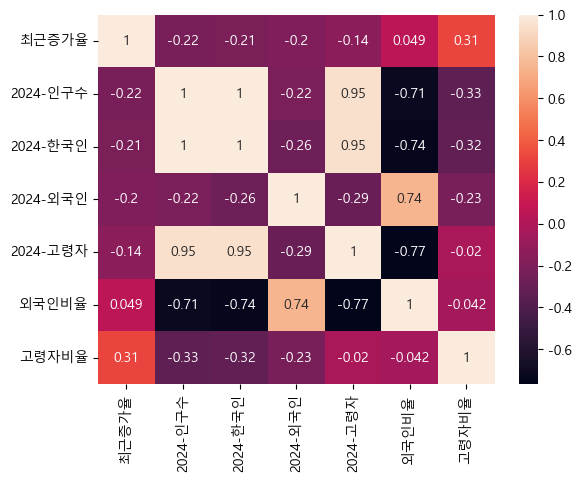

In [46]:
import matplotlib.font_manager as fm

# font file 경로를 사용해서 matplotlib이 관리하는 폰트 이름 가져오기
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams['font.family'] = font_name # matplotlib가 사용할 폰트 지정
plt.rcParams['axes.unicode_minus'] = False

sns.heatmap(df_pop_and_cctv2.corr(), annot=True)
plt.show()